In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/Master Thesis/DeepRL

/content/gdrive/My Drive/Master Thesis/DeepRL


In [3]:
!ls -l

total 1263
drwx------ 2 root root   4096 Nov  8 12:06  agents
-rw------- 1 root root    422 Nov  8 13:24  Dockerfile
-rw------- 1 root root 533681 Nov  9 18:41  DQN_Cartpole.ipynb
-rw------- 1 root root 570491 Nov  9 19:32  DQN_Lunar_Lander.ipynb
drwx------ 2 root root   4096 Nov  8 12:06  DQN_trained_models
drwx------ 2 root root   4096 Nov  8 12:07  helpers
-rw------- 1 root root  14214 Nov 10 08:08  PG_Cartpole.ipynb
-rw------- 1 root root 151424 Nov 10 08:22  PG_Lunar_Lander.ipynb
drwx------ 2 root root   4096 Nov 10 08:09  Presentations
-rw------- 1 root root     48 Nov  8 11:59  README.md
-rw------- 1 root root     25 Nov  8 13:24  requirements.txt
drwx------ 2 root root   4096 Nov 10 08:09 'Thesis Drafts'


In [4]:
!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [5]:
!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions

     |████████████████████████████████| 448 kB 5.1 MB/s 
     |████████████████████████████████| 20.9 MB 1.5 MB/s 
     |████████████████████████████████| 479 kB 67.0 MB/s 
     |████████████████████████████████| 861 kB 53.9 MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=7fc55f6b40a0b705bf374976c6ff915c7a6dbf49ebadeab9b6d8a897226633a0
  Stored in directory: /root/.cache/pip/wheels/a0/95/26/4cf34fb92765c95fb7851fd447511594bcc3a50e504bd09af9
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465842 sha256=f00c09a16ce3860f0d8473be6b2fb5b079df69329631d698f04943e56766e80b
  Stored in directory: /root/.cache/pip/wheels/8d/c4/b5/e4b61f624036f83566580d61f24af7b73180b1361ee1ab3722
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator


In [6]:
from agents.PG_Agent import PG_Agent
from helpers.plot_util import *

In [ ]:
agent = PG_Agent(
                env_name="LunarLander-v2",
                 ALPHA= 0.00015,
                 GAMMA=0.99,
                 layer1_size=256,  
                 layer2_size=256, 
                 fname='model.h5',
                 reproduce_seed=None)

#Good Settings
'''
ALPHA= 0.00025,
GAMMA=0.99,
layer1_size=128,  
layer2_size=128, 
num_episodes=5000
'''
None

#### Train DQN_agent

In [ ]:
agent.train_multiple_episodes(num_episodes=5000)      ## 500 was good

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Eps: 4999 ,  Eps steps: 1000 , Ep_Reward : 178.06 , Avg_Reward : 135.91 , Loss: -19.025
 LunarLander-v2 Problem took 5000 episodes


## Save the model

In [ ]:
agent.save_model_weights()

### Learning Plot 

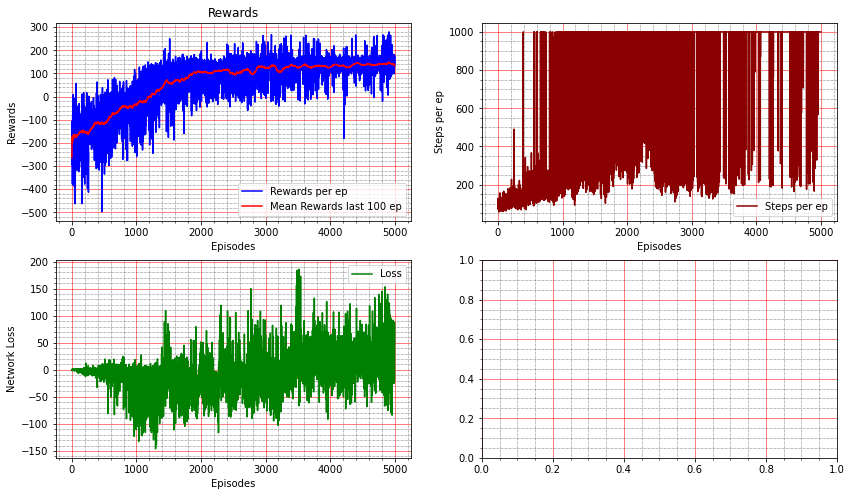

In [ ]:
from helpers.plot_util import learning_plot
learning_plot(agent.get_stats())

### Render a policy

In [ ]:
test_cases_data , image_paths  = test_instances_of_env(
                                        model=agent.get_trained_model(), # If you want to use the Recently Trained Model
                                        #model=agent.load_default_model(),  # If you want to use the default trained model   
                                        test_cases=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75],
                                        env_name=agent.env_name
                                       )

Tests # 42 , Rewards 110.24831644799481 , Steps 1000
Tests # 900 , Rewards 101.65984894989526 , Steps 1000
Tests # 930 , Rewards 105.96054506993279 , Steps 1000
Tests # 180 , Rewards 69.46068368217882 , Steps 1000
Tests # 660 , Rewards 213.61986377066347 , Steps 572
Tests # 240 , Rewards 83.96054963553102 , Steps 1000
Tests # 960 , Rewards 131.0082667188379 , Steps 1000
Tests # 450 , Rewards 119.46187475221352 , Steps 1000
Tests # 30 , Rewards 90.29790070118324 , Steps 1000
Tests # 90 , Rewards 77.87104285490098 , Steps 1000
Tests # 150 , Rewards 136.05484751700695 , Steps 1000
Tests # 210 , Rewards 85.77467106282565 , Steps 1000
Tests # 330 , Rewards 106.84530838457303 , Steps 1000
Tests # 420 , Rewards 58.28816333942356 , Steps 1000
Tests # 510 , Rewards 106.66597269943195 , Steps 1000
Tests # 75 , Rewards 130.91966781252506 , Steps 1000


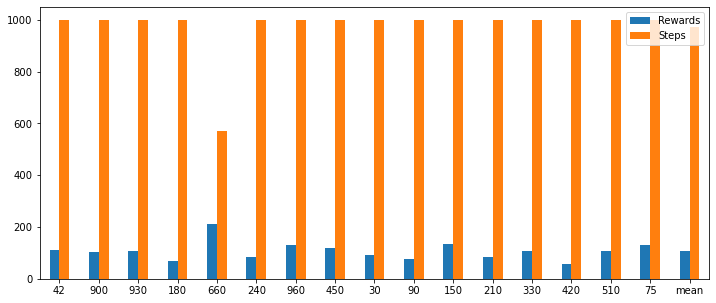

In [ ]:
plot_test_cases(test_cases_data)

## Render Test Case images

In [ ]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

x=len(test_cases_data)//4
y=len(test_cases_data)//4
grid = GridspecLayout(x, y)

for i in range(x):
    for j in range(y):
        img=open(image_paths[4*i+j],'rb').read()
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x83\x00\x00\x00\x00\x00\xcc\xcc\x0033ff3f3fffff33\x…